# Constructing a 2D ensemble of HIV-1 TAR

* **The Goal**:
    * Generate a 2D ensemble of HIV-1 TAR. 
    * **The Input files are**:
        * Experimental chemical shifts: ```data/chemical_shifts/measured_shifts_7JU1.dat```
        * 200 2D structures of the HIV-1 TAR (see: ```RNA Folding HIV-1 TAR```): ```data/states_HIV_TAR.sav```    
* **Tasks**:
    1. Train a neural network model to predict chemical shifts from 2D structures
    2. Determine the uncertainity of the model by applying it the testing data
    3. Load the saved states of the HIV-1 TAR
    4. Predict and store chemical shifts for each state
    5. Format and write files need for BME
    6. Use BME to determine weights
    7. Determine the conformer with the height weight.

* **Question**:
    * What is the dominant state? How does it compare to the native 2D structure of TAR? If different, explain why.

In [1]:
%%capture
from machine_learning import *
from PyRNA import *
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_absolute_error
import os
import talos

## 1. Train a neural network model to predict chemical shifts from 2D structures

Use the function: ``talos_model()`` to train your model. In addition to the training and testing (validation) data, you will need to pass a set of hyperparameters to this function. 

``best_talos_parameters()`` returns a set of optimized parameters you could use to train your model. 

In [2]:
# inspect database, it is a dictionary containing all the data you need to train your model
database = load_entire_database()
print(type(database))

<class 'dict'>


In [3]:
database.keys()

dict_keys(['one-hot-encoder', 'raw_features', 'raw_targets', 'targets', 'features', 'features_train', 'features_test', 'targets_train', 'targets_test', 'scaler', 'targets_train_scaled', 'targets_test_scaled'])

In [22]:
t = talos.Scan(x=database['features_train'],
              y=database['targets_train_scaled'],
              x_val=database['features_test'],
              y_val=database['targets_test_scaled'],
              model=talos_model,
              fraction_limit=0.0001,
              params=talos_search_space(),
              experiment_name='tune_1')

100%|██████████| 60/60 [50:41<00:00, 50.70s/it]   


In [65]:
t.details

experiment_name                  tune_1
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            12/16/20/20:42
x_shape                      (2681, 53)
y_shape                      (2681, 19)
dtype: object

In [72]:
t.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,activation,batch_size,...,emb_output_dims,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,lr,optimizer,weight_regulizer
0,12/16/20-195123,12/16/20-195146,22.706313,150,0.651918,0.221932,0.657201,0.204173,elu,24,...,None,150,64,1,normal,relu,mean_absolute_error,4.55,RMSprop,None
1,12/16/20-195146,12/16/20-195206,20.543783,150,0.838065,0.192093,0.842555,0.172876,elu,27,...,None,150,32,8,normal,relu,mean_squared_error,2.30,Nadam,None
2,12/16/20-195206,12/16/20-195237,30.222464,150,0.625658,0.204774,0.634131,0.172876,elu,16,...,None,150,64,4,normal,elu,mean_squared_error,1.40,RMSprop,None
3,12/16/20-195237,12/16/20-195320,42.782368,150,0.869141,0.165237,0.871862,0.162444,relu,10,...,None,150,8,2,normal,relu,mean_squared_error,3.20,Nadam,None
4,12/16/20-195320,12/16/20-195419,58.918323,150,0.644205,0.189855,0.641255,0.184799,elu,7,...,None,150,32,8,normal,elu,mean_squared_error,2.30,Nadam,None
5,12/16/20-195419,12/16/20-195441,21.915926,150,0.864792,0.153301,0.888240,0.135618,relu,27,...,None,150,16,1,normal,relu,mean_squared_error,2.30,Adam,None
6,12/16/20-195441,12/16/20-195504,23.501580,150,0.905166,0.119731,0.886332,0.095380,relu,21,...,None,150,4,0,uniform,relu,mean_squared_error,0.50,Adam,None
7,12/16/20-195504,12/16/20-195531,26.814314,150,0.761810,0.105185,0.708587,0.108793,relu,16,...,None,150,4,8,normal,elu,mean_squared_error,1.40,RMSprop,None
8,12/16/20-195531,12/16/20-195551,20.109030,150,0.661625,0.197314,0.660500,0.192250,elu,24,...,None,150,16,8,uniform,relu,mean_absolute_error,2.30,RMSprop,None
9,12/16/20-195552,12/16/20-195611,19.839633,150,0.680568,0.132413,0.691203,0.131148,relu,27,...,None,150,16,4,uniform,relu,mean_absolute_error,1.40,Adam,None


In [74]:
# Get minimum value of a single column 'val_acc'
min_val_acc = t.data['val_acc'].min()
print(min_val_acc)

0.0953800305724144


In [102]:
best_talos_param_row = t.data.loc[t.data['val_acc'] == min_val_acc]
print(best_talos_param_row.columns.tolist())

print('lr:  {}'.format(best_talos_param_row['lr'].values[0]))
print('first_neuron:  {}'.format(best_talos_param_row['first_neuron'].values[0]))
print('hidden_layers:  {}'.format(best_talos_param_row['hidden_layers'].values[0]))
print('batch_size:  {}'.format(best_talos_param_row['batch_size'].values[0]))
print('round_epochs:  {}'.format(best_talos_param_row['round_epochs'].values[0]))
print('dropout:  {}'.format(best_talos_param_row['dropout'].values[0]))
print('weight_regulizer:  {}'.format(best_talos_param_row['weight_regulizer'].values[0]))
print('emb_output_dims:  {}'.format(best_talos_param_row['emb_output_dims'].values[0]))
print('optimizer:  {}'.format(best_talos_param_row['optimizer'].values[0]))
print('kernel_initializer:  {}'.format(best_talos_param_row['kernel_initializer'].values[0]))
print('losses:  {}'.format(best_talos_param_row['losses'].values[0]))
print('activation:  {}'.format(best_talos_param_row['activation'].values[0]))
print('last_activation:  {}'.format(best_talos_param_row['last_activation'].values[0]))

['start', 'end', 'duration', 'round_epochs', 'loss', 'acc', 'val_loss', 'val_acc', 'activation', 'batch_size', 'dropout', 'emb_output_dims', 'epochs', 'first_neuron', 'hidden_layers', 'kernel_initializer', 'last_activation', 'losses', 'lr', 'optimizer', 'weight_regulizer']
lr:  0.5
first_neuron:  4
hidden_layers:  0
batch_size:  21
round_epochs:  150
dropout:  0.4
weight_regulizer:  None
emb_output_dims:  None
optimizer:  Adam
kernel_initializer:  uniform
losses:  mean_squared_error
activation:  relu
last_activation:  relu


In [103]:
def obtained_model_params():
    p = {'lr': 4,
     'first_neuron': 4,
     'hidden_layers': 0,
     'batch_size': 21,
     'epochs': 150,
     'dropout': 0.4,
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'optimizer': 'Adam',
     'kernel_initializer': 'uniform',
     'losses': 'mean_squared_error',
     'activation': 'relu',
     'last_activation': 'relu'}
    return(p)

## (Comment): I ran talos.Scan above, but I did not need to run talos.Scan. I could just use best_talos_parameters() from machine_learning.py

In [4]:
history, model = talos_model(x_train=database['features_train'],
                               y_train=database['targets_train_scaled'],
                               x_val=database['features_test'],
                               y_val=database['targets_test_scaled'],
                               params=best_talos_parameters())

## 2. Determine the uncertainity of the model by applying it the testing data

This Notebook 5 provides some hints as to how to do this. Ultimately, for BME, you'll need to write out a chemical shift uncertainity file with the following format:
```
C1' 0.621
C2' 0.704
...
H6 5.346
H8 3.560
```
where column:
1. is the nucleus type or atom name
2. is the value of the uncertainty

In [5]:
unc, cs = get_model_uncertainity(model, database, output_file = "get_model_uncertainity.txt")

Nucleus: C1' MAE: 0.912 ppm
Nucleus: C2' MAE: 0.600 ppm
Nucleus: C3' MAE: 1.351 ppm
Nucleus: C4' MAE: 0.874 ppm
Nucleus: C5' MAE: 0.999 ppm
Nucleus: C2 MAE: 1.554 ppm
Nucleus: C5 MAE: 1.641 ppm
Nucleus: C6 MAE: 0.968 ppm
Nucleus: C8 MAE: 1.197 ppm
Nucleus: H1' MAE: 0.132 ppm
Nucleus: H2' MAE: 0.130 ppm
Nucleus: H3' MAE: 0.129 ppm
Nucleus: H4' MAE: 0.096 ppm
Nucleus: H5' MAE: 0.302 ppm
Nucleus: H5'' MAE: 0.155 ppm
Nucleus: H2 MAE: 0.181 ppm
Nucleus: H5 MAE: 0.144 ppm
Nucleus: H6 MAE: 0.178 ppm
Nucleus: H8 MAE: 0.187 ppm


In [6]:
print(type(unc))
print(unc)
print(type(cs))
print(cs)

<class 'pandas.core.frame.DataFrame'>
   nucleus     error
0      C1'  0.912273
1      C2'  0.599835
2      C3'  1.351180
3      C4'  0.874018
4      C5'  0.999391
5       C2  1.553545
6       C5  1.641267
7       C6  0.968041
8       C8  1.196771
9      H1'  0.131956
10     H2'  0.129776
11     H3'  0.128774
12     H4'  0.096248
13     H5'  0.301903
14    H5''  0.155315
15      H2  0.181069
16      H5  0.144323
17      H6  0.177907
18      H8  0.186805
<class 'pandas.core.frame.DataFrame'>
    nucleus   expCS     predCS     error
0       C1'  93.134  91.630714  1.503286
1       C1'  93.096  91.919991  1.176009
2       C1'  93.854  92.751717  1.102283
3       C1'  92.880  91.881050  0.998950
4       C1'  94.532  93.967796  0.564204
..      ...     ...        ...       ...
666      H8   7.700   7.658394  0.041606
667      H8   7.701   7.720212  0.019212
668      H8   8.150   7.930806  0.219194
669      H8   7.110   7.524860  0.414860
670      H8   7.802   7.890313  0.088313

[12749 rows

## 3. Load the saved states of the HIV-1 TAR
Inspect ```results```. It is a list of 1000 states dictionary, same as the kind you worked with in the RNA Folding assignment.

In [7]:
import joblib
filename = 'data/states_HIV_TAR.sav'
results = joblib.load(filename)

In [8]:
print(type(results))
print(len(results))
print(type(results[0]))
print(len(results[0]))
print(results[0])

<class 'list'>
200
<class 'dict'>
11
{'sequence': ['G', 'G', 'C', 'A', 'G', 'A', 'U', 'C', 'U', 'G', 'A', 'G', 'C', 'C', 'U', 'G', 'G', 'G', 'A', 'G', 'C', 'U', 'C', 'U', 'C', 'U', 'G', 'C', 'C'], 'residues': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'bp_compatiable_matrix': array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.

## 4. Predict and store chemical shifts for each state of the HIV-1 TAR

Hint see: ```state2CT(), cT2features()```

Ultimately you'll need to write out a file with the following format:
```
1 1 GUA C5' 66.5033 7JU1
1 1 GUA C4' 81.6784 7JU1
1 1 GUA C3' 74.0789 7JU1
...
200 29 CYT H1' 5.67906 7JU1
200 29 CYT H5 5.45511 7JU1
200 29 CYT H6 7.75069 7JU1
```
where column:
1. is the state or model number
2. is the residue number
3. is the nucleus type or atom name
4. is the chemical shift value
5. is an arbitrary label

In [9]:
# add code here
# I need to create a computed_shift.dat from TAR's 2D structure information that is from states_HIV_TAR.sav file.
# the features2cs gives you the chem shifts. You can store them in a list when looping over the 200 states. 
# By storing, I mean creat an empty list and use list.append(chemshift). There's no need to write a file 
# at this stage. Next will be rearrang the data format to the one stated in the question. After that, 
# save it to a dat file, which is the input for section 5. Please refer to 8.B for that.

state_chem_shift_list = []
encoder = database['one-hot-encoder']
scaler = database['scaler']

for st_num, dict_el in enumerate(results,1):
    ct = state2CT(dict_el)
    features = cT2features(ct, str(st_num), is_dataframe = True)
    calc_chem_shifts = features2CS(features, model, encoder, scaler)
    # add state number, residue number, residue type, an arbitrary label
    # add state number
    calc_chem_shifts['state_num'] = pd.Series(np.array([st_num for i in range(len(calc_chem_shifts))]))
    # add residue number
    calc_chem_shifts['residue_num'] = pd.Series(np.array([i+1 for i in range(len(calc_chem_shifts))]))
    # add residue type
    calc_chem_shifts['residue_type'] = pd.Series(np.array(['GUA','GUA','CYT','ADE','GUA','ADE','URA','CYT','URA','GUA','ADE','GUA','CYT','CYT','URA','GUA','GUA','GUA','ADE','GUA','CYT','URA','CYT','URA','CYT','URA','GUA','CYT','CYT']))
    # add an arbitrary label
    calc_chem_shifts['label'] = pd.Series(np.array(['7JU1' for i in range(len(calc_chem_shifts))]))
    state_chem_shift_list.append(calc_chem_shifts)

In [10]:
print(state_chem_shift_list[0])


          C1'        C2'        C3'        C4'        C5'          C2  \
0   92.208687  75.149315  73.680519  82.996384  66.658653  155.053574   
1   93.059845  75.319382  72.505165  82.161926  65.397934  154.548325   
2   93.771271  75.426720  71.887184  81.800087  64.613831  158.436646   
3   92.801285  75.526505  72.782661  82.451080  65.839676  152.741913   
4   92.789536  75.534233  72.247688  82.174606  65.469635  153.966568   
5   92.142944  75.621841  73.442062  83.228310  66.355766  154.233658   
6   92.812569  75.515129  73.745026  83.551208  66.458794  153.454224   
7   92.708633  75.377518  72.677315  82.904312  65.579651  157.263351   
8   92.532150  75.675529  73.787048  82.962379  65.214951  152.831223   
9   91.682678  75.599426  73.765266  83.245842  66.447655  155.510834   
10  91.504700  76.063210  74.551537  83.815018  66.905983  154.317047   
11  92.602936  75.316391  72.706200  82.345238  65.936356  155.579681   
12  94.167198  75.536179  71.999443  81.861816  64.

In [11]:
# rearrange dataframe
rearranged_chem_shift_df = pd.melt(state_chem_shift_list[0], id_vars=['state_num','residue_num','residue_type','label'])
# sort_values
rearranged_chem_shift_df = rearranged_chem_shift_df.sort_values(by=["state_num","residue_num"])
# rearrange the column order
rearranged_chem_shift_df = rearranged_chem_shift_df[['state_num','residue_num','residue_type','variable','value','label']]
rearranged_chem_shift_df

,state_num,residue_num,residue_type,variable,value,label
0,1,1,GUA,C1',92.208687,7JU1
29,1,1,GUA,C2',75.149315,7JU1
58,1,1,GUA,C3',73.680519,7JU1
87,1,1,GUA,C4',82.996384,7JU1
116,1,1,GUA,C5',66.658653,7JU1
...,...,...,...,...,...,...
434,1,29,CYT,H5'',5.477017,7JU1
463,1,29,CYT,H2,4.426570,7JU1
492,1,29,CYT,H5,4.070240,7JU1
521,1,29,CYT,H6,7.653174,7JU1


In [12]:
# iterate through all 200 DataFrame
rearranged_df = []

for element_df in state_chem_shift_list:
    # rearrange dataframe
    df_1 = pd.melt(element_df, id_vars=['state_num','residue_num','residue_type','label'])
    # sort_values
    df_2 = df_1.sort_values(by=["state_num","residue_num"])
    # rearrange the column order
    df_3 = df_2[['state_num','residue_num','residue_type','variable','value','label']]
    rearranged_df.append(df_3)
print(rearranged_df[:3])

[     state_num  residue_num residue_type variable      value label
0            1            1          GUA      C1'  92.208687  7JU1
29           1            1          GUA      C2'  75.149315  7JU1
58           1            1          GUA      C3'  73.680519  7JU1
87           1            1          GUA      C4'  82.996384  7JU1
116          1            1          GUA      C5'  66.658653  7JU1
..         ...          ...          ...      ...        ...   ...
434          1           29          CYT     H5''   5.477017  7JU1
463          1           29          CYT       H2   4.426570  7JU1
492          1           29          CYT       H5   4.070240  7JU1
521          1           29          CYT       H6   7.653174  7JU1
550          1           29          CYT       H8   7.834831  7JU1

[551 rows x 6 columns],      state_num  residue_num residue_type variable      value label
0            2            1          GUA      C1'  92.208687  7JU1
29           2            1         

In [13]:
# Stack all the DataFrames on top of each other

df_stacked = pd.concat([rearranged_df[i] for i in range(len(rearranged_df))],axis=0)
print(df_stacked)

     state_num  residue_num residue_type variable      value label
0            1            1          GUA      C1'  92.208687  7JU1
29           1            1          GUA      C2'  75.149315  7JU1
58           1            1          GUA      C3'  73.680519  7JU1
87           1            1          GUA      C4'  82.996384  7JU1
116          1            1          GUA      C5'  66.658653  7JU1
..         ...          ...          ...      ...        ...   ...
434        200           29          CYT     H5''   5.798152  7JU1
463        200           29          CYT       H2   4.171263  7JU1
492        200           29          CYT       H5   4.030337  7JU1
521        200           29          CYT       H6   7.645439  7JU1
550        200           29          CYT       H8   7.952548  7JU1

[110200 rows x 6 columns]


In [14]:
# create a dat file
df_stacked.to_csv("data/chemical_shifts/final_assignment_simulated_7JU1.dat", sep = " ", index = False, header = False)

## 5. Formatted and write files need for BME

In [15]:
# add code here
from reweighting import *

BME_formatted_chemical_shift_data = write_BME_chemical_shifts(input_exp ="data/chemical_shifts/measured_shifts_7JU1.dat",
                                                                input_sim = "data/chemical_shifts/final_assignment_simulated_7JU1.dat",
                                                                input_accuracy = "get_model_uncertainity.txt",
                                                                output_name_exp = "data/chemical_shifts/final_assignment_bme_experimental_7JU1.dat",
                                                                output_name_sim = "data/chemical_shifts/final_assignment_bme_simulated_7JU1.dat")
BME_formatted_chemical_shift_data

(     DATA=JCOUPLINGS  PRIOR=GAUSS
 0             91.110     0.912273
 1             74.965     0.599835
 2             75.003     1.351180
 3             83.598     0.874018
 4             67.436     0.999391
 ..               ...          ...
 400            4.151     0.096248
 401            5.505     0.144323
 402            4.466     0.301903
 403            4.016     0.155315
 404            7.650     0.177907
 
 [405 rows x 2 columns],
            0          1          2          3          4           5    \
 0    92.208687  75.149315  73.680519  82.996384  66.658653  138.363770   
 1    92.208687  75.149315  73.680519  82.996384  66.658653  138.363770   
 2    92.208687  75.149315  73.680519  82.996384  66.658653  138.363770   
 3    91.334709  75.860138  75.970978  84.690147  67.301880  141.189484   
 4    91.734802  75.252335  74.376518  83.676857  66.970840  139.114609   
 ..         ...        ...        ...        ...        ...         ...   
 195  91.734802  75.252335  

## 6. Use BME to determine weights

In [24]:
# add code here
import math
    
chi2_after_list = []
srel_list = []
for theta in list(range(1,25)):
    try:
        calculated_weight_chi2_srel= find_weights(exp_file="data/chemical_shifts/final_assignment_bme_experimental_7JU1.dat",
                                        sim_file="data/chemical_shifts/final_assignment_bme_simulated_7JU1.dat",
                                        theta=theta)
        chi2_after_list.append(calculated_weight_chi2_srel[2])
        srel_list.append(calculated_weight_chi2_srel[3])
    except:
        chi2_after_list.append(math.inf)
        srel_list.append(math.inf)
print(chi2_after_list)        
best_theta_with_min_chi2_after = chi2_after_list.index(min(chi2_after_list)) + 1

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 20.846154532042885, 20.849445488586873, 20.852777363521792, 20.856147810831313, 20.85954762101259]


In [25]:
print(best_theta_with_min_chi2_after)

20


In [26]:
weight_chi2_srel_with_best_theta = find_weights(exp_file="data/chemical_shifts/final_assignment_bme_experimental_7JU1.dat",
                                        sim_file="data/chemical_shifts/final_assignment_bme_simulated_7JU1.dat",
                                        theta=best_theta_with_min_chi2_after)

# Warning: expt average                    0=9.1110e+01 is smaller than minimum value in simulation 9.1325e+01
# Warning: expt average                    1=7.4965e+01 is smaller than minimum value in simulation 7.5046e+01
# Warning: expt average                    4=6.7436e+01 is larger than maximum value in simulation 6.7348e+01
# Warning: expt average                   15=1.3689e+02 is smaller than minimum value in simulation 1.3743e+02
# Warning: expt average                   16=5.9080e+00 is larger than maximum value in simulation 5.7961e+00
# Warning: expt average                   19=4.5550e+00 is larger than maximum value in simulation 4.5072e+00
# Warning: expt average                   25=9.7419e+01 is smaller than minimum value in simulation 9.9911e+01
# Warning: expt average                   26=6.4532e+01 is smaller than minimum value in simulation 6.4614e+01
# Warning: expt average                   27=1.4065e+02 is smaller than minimum value in simulation 1.4212e+02
# Wa

## 7. Plot or list the weights of each conformer and determine the conformer with the height weight.

In [27]:
# add code here
print(f'weights_with_best_theta: {weight_chi2_srel_with_best_theta[0]}')
print(f'chi2_before: {weight_chi2_srel_with_best_theta[1]}')
print(f'chi2_after: {weight_chi2_srel_with_best_theta[2]}')
print(f'srel: {weight_chi2_srel_with_best_theta[3]}')
print(type(weight_chi2_srel_with_best_theta[0]))

max_weight = 0
max_state = 0
for state_num, el in enumerate(weight_chi2_srel_with_best_theta[0],1):  
    if float(el) >= float(max_weight):
        max_weight = el
        max_state = state_num
    else:
        pass



weights_with_best_theta: [9.64755478e-05 3.19495962e-04 9.64755478e-05 1.75447864e-03
 3.96929847e-02 6.42371488e-04 3.19495962e-04 5.60650629e-05
 9.64755478e-05 1.56949834e-05 3.78095490e-03 9.64755478e-05
 8.86322924e-03 1.72556149e-02 6.30788884e-05 9.41316144e-04
 6.65018708e-05 9.41316144e-04 1.75447864e-03 2.17142549e-05
 6.65018708e-05 7.22280900e-04 3.96929847e-02 2.24617284e-04
 3.96929847e-02 1.72556149e-02 3.06093627e-05 8.86322924e-03
 3.95773880e-04 9.41316144e-04 2.18876114e-03 1.72556149e-02
 3.96929847e-02 6.74398540e-04 5.63631405e-05 2.24617284e-04
 9.64755478e-05 1.72556149e-02 3.19495962e-04 6.42371488e-04
 1.75447864e-03 8.86322924e-03 3.19495962e-04 3.96929847e-02
 8.86322924e-03 1.36368495e-02 1.75447864e-03 3.19495962e-04
 8.86322924e-03 2.24617284e-04 3.96929847e-02 9.64755478e-05
 9.41316144e-04 3.96929847e-02 1.50155510e-04 8.86322924e-03
 3.95773880e-04 3.19495962e-04 6.42371488e-04 1.37191226e-06
 2.18876114e-03 2.28009013e-06 7.22280900e-04 1.06799595e-07

In [29]:
print(f'highest_weight: {max_weight}')
print(f'the_most_dominant_state: {max_state}')

highest_weight: 0.03969298465396562
the_most_dominant_state: 120


## **Question**:
What is the dominant state? How does it compare to the native 2D structure of TAR? If different, explain why.

Add you answer here

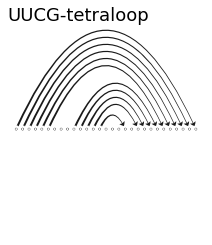

In [71]:
import joblib
filename = 'data/states_HIV_TAR.sav'
results = joblib.load(filename)
state = results[119]
visualize_structure(state2basepair_matrix(state))

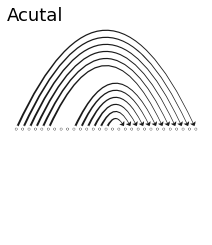

In [73]:
from IPython.display import Image
Image(filename='TAR_2D_actual.png') 

## The 119th state is calculated as the most dominant state with the largest weight, 0.03969298465396562. I visualized this 119th state as shown. The calculated most dominant 2D structure, 119th state, seems pretty similar to the actual 2D structure as shown above visualization.